### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import RFE

warnings.filterwarnings('ignore')

In [2]:
results = pd.DataFrame(columns=["data", "regularization", "package", "accuracy", "precision", "recall", "f1", "rSquared", "AUC"])  # store results

hcc_median = pd.read_csv('../data/raw/median.csv')
hcc_mean = pd.read_csv('../data/raw/mean.csv')
hcc_mode = pd.read_csv('../data/raw/mode.csv')
hcc_iterative = pd.read_csv('../data/raw/iterative.csv')

In [3]:
def get_data(data_name):
    
    if data_name == 'median':
        data = hcc_median
    elif data_name == 'mean':
        data = hcc_mean
    elif data_name == 'mode':
        data = hcc_mode
    else:
         data = hcc_iterative
            
    
    X = data.drop(['Class'], axis=1) # get independent variable
    y = data['Class'] # get dependent variable
    
    # split data 70% to 30%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    
    return X_train, X_test, y_train, y_test

#### Feature Selection using Recursive Feature Elimination(RFE)

In [4]:
def feature_selection(X_train, X_test, y_train):
    model = LogisticRegression()

    #rfe = RFECV(estimator=model, step=1, cv=7)
    rfe = RFE(estimator=model, n_features_to_select = 35, step=1)

    rfe = rfe.fit(X_train, y_train)

    columns = X_train.columns[rfe.support_]

    X_train = rfe.transform(X_train)
    X_test = rfe.transform(X_test)

    X_train = pd.DataFrame(X_train, columns = columns)
    X_test = pd.DataFrame(X_test, columns = columns)
    
    return X_train, X_test, y_train

In [5]:
### R^2 for SkLearn

def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))

def mcfadden_adjusted_rsquare(w, X, y):
    k = float(X.shape[1])
    return 1.0 - ((full_log_likelihood(w, X, y) - k) / null_log_likelihood(w, X, y))

###  
### Using StatsModels



MEAN  IMPUTED DATASET
Optimization terminated successfully.
         Current function value: 0.228057
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6525
Time:                        13:39:36   Log-Likelihood:                -26.227
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 3.406e-08
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                             3.6851  

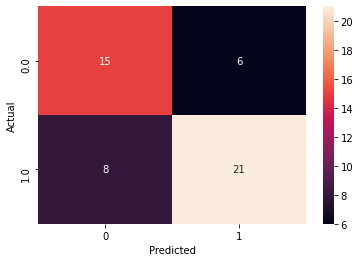



MODE  IMPUTED DATASET
Optimization terminated successfully.
         Current function value: 0.169424
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.7419
Time:                        13:39:37   Log-Likelihood:                -19.484
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 2.969e-10
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Unnamed: 0                        -0.0565  

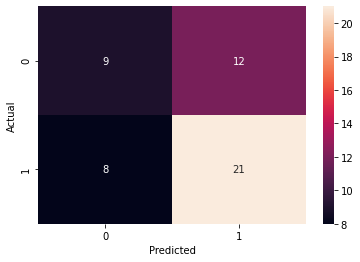



MEDIAN  IMPUTED DATASET
Optimization terminated successfully.
         Current function value: 0.229439
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6504
Time:                        13:39:38   Log-Likelihood:                -26.385
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 3.797e-08
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                             3.5196

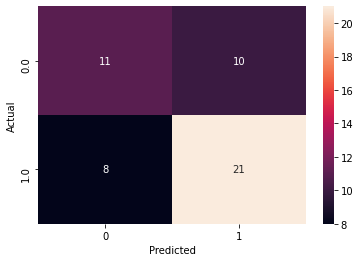



ITERATIVE  IMPUTED DATASET
Optimization terminated successfully.
         Current function value: 0.208838
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6818
Time:                        13:39:38   Log-Likelihood:                -24.016
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 7.399e-09
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gender                             4.9

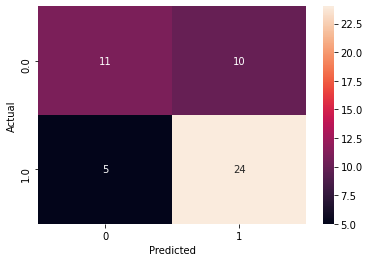

In [6]:
data_list = ['mean', 'mode', 'median', 'iterative']

for data in data_list:
    
    X_train, X_test, y_train, y_test = get_data(data)
    
    X_train, X_test, y_train = feature_selection(X_train, X_test, y_train)
    
    print('\n')
    print(data.upper(), ' IMPUTED DATASET')
    
    ## run logistic regression using stat models
    logistic_sm = sm.Logit(y_train.values.reshape(-1,1), X_train).fit()
    print(logistic_sm.summary())

    y_pred = logistic_sm.predict(X_test) 
    y_pred = (y_pred >= 0.5).astype(int).to_numpy()
    
    print("Accuracy ({}): {:.2f}".format(data, metrics.accuracy_score(y_test, y_pred)))
    print("Precision ({}): {:.2f}".format(data, metrics.precision_score(y_test, y_pred)))
    print("Recall ({}): {:.2f}".format(data, metrics.recall_score(y_test, y_pred)))

    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()
    
    ## save data for comparison
    results = results.append(pd.DataFrame([{"data" : data, 
                    "regularization": "default", 
                    "package": "StatsModels", 
                    "accuracy": np.round(metrics.accuracy_score(y_test, y_pred), 2), 
                    "precision": np.round(metrics.precision_score(y_test, y_pred), 2), 
                    "recall": np.round(metrics.recall_score(y_test, y_pred), 2), 
                    "f1": np.round(metrics.f1_score(y_test, y_pred), 2), 
                    "rSquared": np.round(logistic_sm.prsquared, 2), 
                    "AUC": np.round(metrics.roc_auc_score(y_test, y_pred), 2)}]), ignore_index=True)

###  
### Using ScikitLearn



MEAN  IMPUTED DATASET
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.431590  1.539703
Symptoms                       -0.586055  0.556518
Alcohol                         0.385811  1.470806
Hepatitis B Surface Antigen     0.516934  1.676879
Hepatitis B Core Antibody       0.204852  1.227344
Hepatitis C Virus Antibody     -0.481773  0.617687
Cirrhosis                      -0.086655  0.916994
Endemic Countries               0.204813  1.227295
Smoking                         0.385643  1.470559
Diabetes                       -0.550968  0.576392
Obesity                         0.169974  1.185274
Arterial Hypertension           0.807599  2.242516
Chronic Renal Insufficiency    -0.131133  0.877101
Nonalcoholic Steatohepatitis    0.063077  1.065108
Esophageal Varices             -0.150364  0.860395
Splenomegaly                   -0.071636  0.930870
Portal Vein Thrombosis         -0.307422  0.735340
Liver M

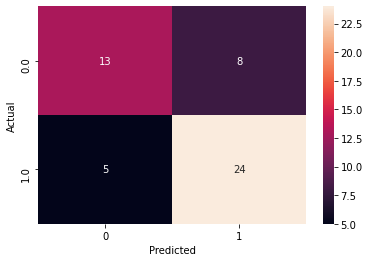

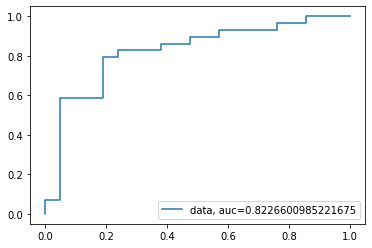



MODE  IMPUTED DATASET
                                    coef  exp_coef
intercept                       0.000000  1.000000
Unnamed: 0                     -0.009842  0.990207
Gender                          0.574084  1.775504
Symptoms                       -0.443683  0.641668
Alcohol                         0.535676  1.708603
Hepatitis B Surface Antigen     0.830322  2.294056
Hepatitis B Core Antibody       0.482230  1.619682
Hepatitis C Virus Antibody     -0.724208  0.484708
Cirrhosis                      -0.094576  0.909758
Endemic Countries               0.151053  1.163058
Smoking                         0.443335  1.557894
Diabetes                       -0.960938  0.382534
Obesity                         0.322454  1.380511
Arterial Hypertension           1.130525  3.097281
Chronic Renal Insufficiency    -0.218801  0.803482
Nonalcoholic Steatohepatitis    0.066471  1.068729
Esophageal Varices             -0.314912  0.729853
Portal Hypertension             0.773673  2.167714
Portal 

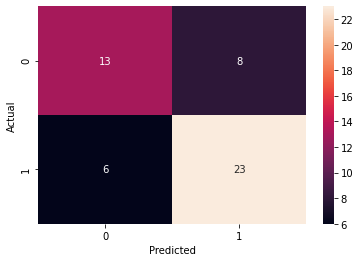

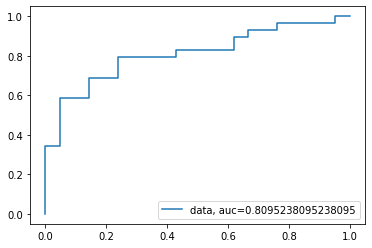



MEDIAN  IMPUTED DATASET
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.670690  1.955586
Symptoms                       -0.514706  0.597676
Alcohol                         0.631448  1.880331
Hepatitis B Surface Antigen     0.797516  2.220020
Hepatitis B Core Antibody       0.496440  1.642862
Hepatitis C Virus Antibody     -0.689374  0.501890
Cirrhosis                      -0.118013  0.888685
Endemic Countries               0.205692  1.228374
Smoking                         0.492751  1.636814
Diabetes                       -0.961697  0.382244
Obesity                         0.261308  1.298628
Arterial Hypertension           1.242655  3.464800
Chronic Renal Insufficiency    -0.190764  0.826328
Nonalcoholic Steatohepatitis    0.054650  1.056171
Esophageal Varices             -0.371480  0.689713
Splenomegaly                    0.085761  1.089546
Portal Vein Thrombosis         -0.232454  0.792586
Liver

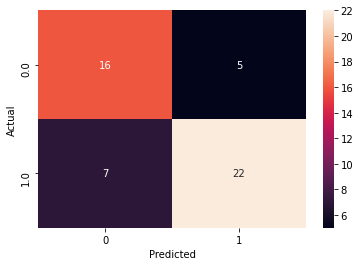

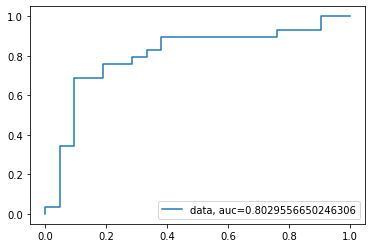



ITERATIVE  IMPUTED DATASET
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.366403  1.442537
Symptoms                       -0.595116  0.551499
Hepatitis B Surface Antigen     0.497537  1.644665
Hepatitis B Core Antibody       0.107478  1.113467
Hepatitis C Virus Antibody     -0.513271  0.598535
Endemic Countries               0.204886  1.227385
Smoking                         0.239212  1.270248
Diabetes                       -0.433298  0.648367
Obesity                         0.207859  1.231040
Arterial Hypertension           0.814411  2.257846
Chronic Renal Insufficiency    -0.065358  0.936732
Nonalcoholic Steatohepatitis    0.027707  1.028094
Esophageal Varices             -0.131331  0.876928
Splenomegaly                   -0.144731  0.865255
Portal Hypertension             0.149765  1.161562
Portal Vein Thrombosis         -0.289786  0.748424
Liver Metastasis               -0.275190  0.759428
Ag

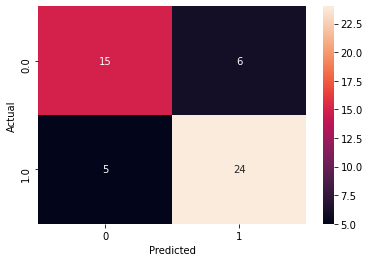

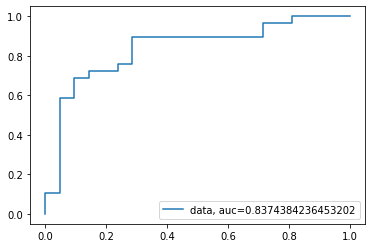

In [7]:
data_list = ['mean', 'mode', 'median', 'iterative']

for data in data_list:
    
    X_train, X_test, y_train, y_test = get_data(data)
    
    X_train, X_test, y_train = feature_selection(X_train, X_test, y_train)
    
    print('\n')
    print(data.upper(), ' IMPUTED DATASET')
    
    ## run logistic regression using sklearn
    logistic = LogisticRegression(fit_intercept=False)
    logistic = logistic.fit(X_train,y_train)
    y_pred = logistic.predict_proba(X_test)[::, 1]
    y_pred = (y_pred >= 0.5).astype(int)
    
    w = np.array(logistic.coef_).transpose()
    
    # printing
    values = np.append(logistic.intercept_, logistic.coef_)

    # get the names of the values
    names = np.append('intercept', X_train.columns)
    table_ = pd.DataFrame(values, index = names, columns=['coef'])
    table_['exp_coef'] = np.exp(table_['coef'])
    print(table_)
    
    print('\n')
    print("Accuracy ({}): {:.2f}".format(data, metrics.accuracy_score(y_test, y_pred)))
    print("Precision ({}): {:.2f}".format(data, metrics.precision_score(y_test, y_pred)))
    print("Recall ({}): {:.2f}".format(data, metrics.recall_score(y_test, y_pred)))

    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()
    
    y_pred_proba = logistic.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    ## save data for comparison
    results = results.append(pd.DataFrame([{"data" : data, 
                    "regularization": "default", 
                    "package": "SkLearn", 
                    "accuracy": np.round(metrics.accuracy_score(y_test, y_pred), 2), 
                    "precision": np.round(metrics.precision_score(y_test, y_pred), 2), 
                    "recall": np.round(metrics.recall_score(y_test, y_pred), 2), 
                    "f1": np.round(metrics.f1_score(y_test, y_pred), 2), 
                    "rSquared": np.round(mcfadden_rsquare(w, X_test, y_pred), 2), 
                    "AUC": np.round(metrics.roc_auc_score(y_test, y_pred), 2)}]), ignore_index=True)

## Regularizations

### Using StatsModels



MEAN  IMPUTED DATASET using  Ridge
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2280574133501607
            Iterations: 210
            Function evaluations: 232
            Gradient evaluations: 210
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6525
Time:                        13:39:41   Log-Likelihood:                -26.227
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 3.406e-08
                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------

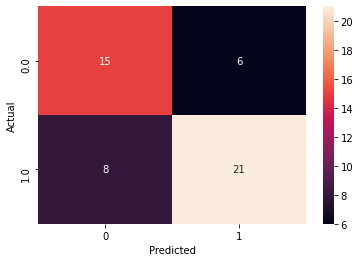



MEAN  IMPUTED DATASET using  Lasso
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2280574133501607
            Iterations: 210
            Function evaluations: 232
            Gradient evaluations: 210
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6525
Time:                        13:39:41   Log-Likelihood:                -26.227
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 3.406e-08
                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------

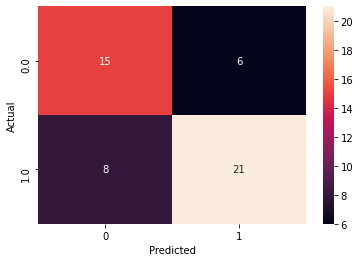



MODE  IMPUTED DATASET using  Ridge
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.16942420633539362
            Iterations: 248
            Function evaluations: 270
            Gradient evaluations: 248
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.7419
Time:                        13:39:42   Log-Likelihood:                -19.484
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 2.969e-10
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------

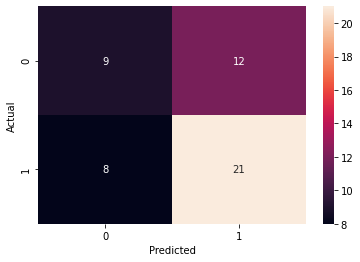



MODE  IMPUTED DATASET using  Lasso
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.16942420633539362
            Iterations: 248
            Function evaluations: 270
            Gradient evaluations: 248
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.7419
Time:                        13:39:42   Log-Likelihood:                -19.484
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 2.969e-10
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------

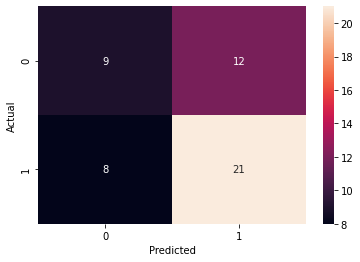



MEDIAN  IMPUTED DATASET using  Ridge
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2294390718808687
            Iterations: 202
            Function evaluations: 223
            Gradient evaluations: 202
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6504
Time:                        13:39:43   Log-Likelihood:                -26.385
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 3.797e-08
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------

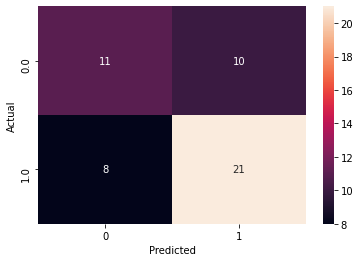



MEDIAN  IMPUTED DATASET using  Lasso
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2294390718808687
            Iterations: 202
            Function evaluations: 223
            Gradient evaluations: 202
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6504
Time:                        13:39:43   Log-Likelihood:                -26.385
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 3.797e-08
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------

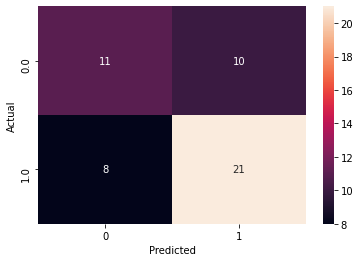



ITERATIVE  IMPUTED DATASET using  Ridge
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2088381910464242
            Iterations: 221
            Function evaluations: 243
            Gradient evaluations: 221
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6818
Time:                        13:39:44   Log-Likelihood:                -24.016
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 7.399e-09
                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------

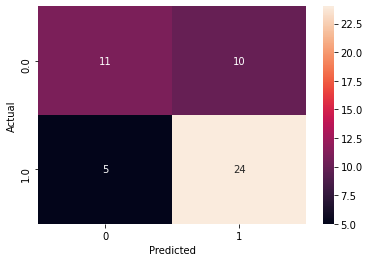



ITERATIVE  IMPUTED DATASET using  Lasso
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2088381910464242
            Iterations: 221
            Function evaluations: 243
            Gradient evaluations: 221
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  115
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           34
Date:                Mon, 26 Oct 2020   Pseudo R-squ.:                  0.6818
Time:                        13:39:44   Log-Likelihood:                -24.016
converged:                       True   LL-Null:                       -75.482
Covariance Type:            nonrobust   LLR p-value:                 7.399e-09
                                     coef    std err          z      P>|z|      [0.025      0.975]
-------------

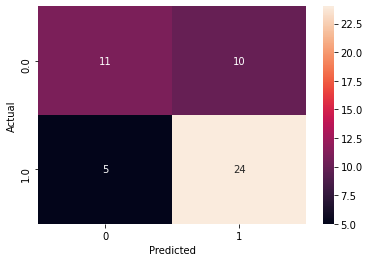

In [8]:
data_list = ['mean', 'mode', 'median', 'iterative']

for data in data_list:
    
    X_train, X_test, y_train, y_test = get_data(data)
    
    X_train, X_test, y_train = feature_selection(X_train, X_test, y_train)
    
    for i in [0, 1]:
        print('\n')
        print(data.upper(), ' IMPUTED DATASET using ', 'Lasso' if i == 1 else 'Ridge')

        ## run logistic regression using stat models
        logistic_sm = sm.Logit(y_train.values.reshape(-1,1), X_train).fit_regularized(L1_wt = i) # if L1_wt = 1, Lasso: 0, Ridge
        print(logistic_sm.summary())

        y_pred = logistic_sm.predict(X_test) 
        y_pred = (y_pred >= 0.5).astype(int).to_numpy()

        print("Accuracy ({}): {:.2f}".format(data, metrics.accuracy_score(y_test, y_pred)))
        print("Precision ({}): {:.2f}".format(data, metrics.precision_score(y_test, y_pred)))
        print("Recall ({}): {:.2f}".format(data, metrics.recall_score(y_test, y_pred)))

        confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
        sn.heatmap(confusion_matrix, annot=True)
        plt.show()

        ## save data for comparison
        results = results.append(pd.DataFrame([{"data" : data, 
                        "regularization": 'Lasso' if i == 1 else 'Ridge', 
                        "package": "StatsModels", 
                        "accuracy": np.round(metrics.accuracy_score(y_test, y_pred), 2), 
                        "precision": np.round(metrics.precision_score(y_test, y_pred), 2), 
                        "recall": np.round(metrics.recall_score(y_test, y_pred), 2), 
                        "f1": np.round(metrics.f1_score(y_test, y_pred), 2), 
                        "rSquared": np.round(logistic_sm.prsquared, 2), 
                        "AUC": np.round(metrics.roc_auc_score(y_test, y_pred), 2)}]), ignore_index=True)

#### Using SkLearn



MEAN  IMPUTED DATASET using  Lasso
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.466066  1.593712
Symptoms                       -0.860510  0.422946
Alcohol                         0.558099  1.747347
Hepatitis B Surface Antigen     0.122607  1.130440
Hepatitis B Core Antibody       0.000000  1.000000
Hepatitis C Virus Antibody     -0.686065  0.503554
Cirrhosis                       0.000000  1.000000
Endemic Countries               0.304211  1.355555
Smoking                         0.077377  1.080450
Diabetes                       -1.209295  0.298408
Obesity                         0.000000  1.000000
Arterial Hypertension           1.569953  4.806421
Chronic Renal Insufficiency     0.000000  1.000000
Nonalcoholic Steatohepatitis    0.000000  1.000000
Esophageal Varices              0.000000  1.000000
Splenomegaly                    0.000000  1.000000
Portal Vein Thrombosis          0.000000  1.0

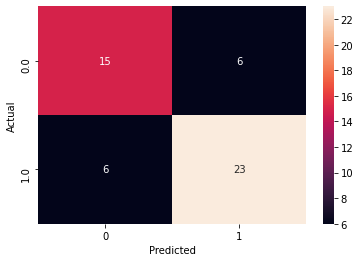

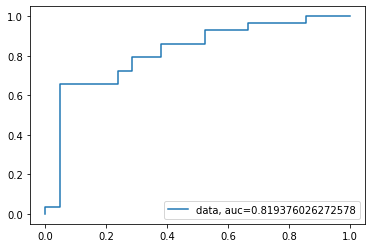



MEAN  IMPUTED DATASET using  Ridge
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.431590  1.539703
Symptoms                       -0.586055  0.556518
Alcohol                         0.385811  1.470806
Hepatitis B Surface Antigen     0.516934  1.676879
Hepatitis B Core Antibody       0.204852  1.227344
Hepatitis C Virus Antibody     -0.481773  0.617687
Cirrhosis                      -0.086655  0.916994
Endemic Countries               0.204813  1.227295
Smoking                         0.385643  1.470559
Diabetes                       -0.550968  0.576392
Obesity                         0.169974  1.185274
Arterial Hypertension           0.807599  2.242516
Chronic Renal Insufficiency    -0.131133  0.877101
Nonalcoholic Steatohepatitis    0.063077  1.065108
Esophageal Varices             -0.150364  0.860395
Splenomegaly                   -0.071636  0.930870
Portal Vein Thrombosis         -0.307422  0.7

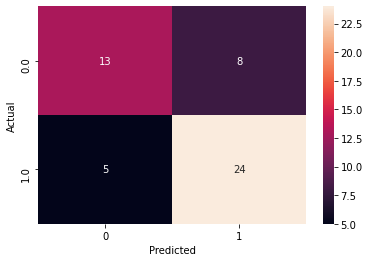

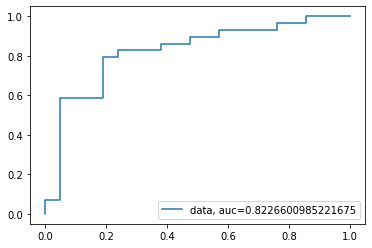



MEAN  IMPUTED DATASET using  ElasticNet
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.000410  1.000410
Symptoms                       -0.002531  0.997472
Alcohol                         0.000533  1.000534
Hepatitis B Surface Antigen     0.000579  1.000579
Hepatitis B Core Antibody       0.000649  1.000649
Hepatitis C Virus Antibody     -0.001170  0.998831
Cirrhosis                       0.000000  1.000000
Endemic Countries               0.000188  1.000188
Smoking                         0.000990  1.000990
Diabetes                       -0.000868  0.999132
Obesity                         0.000705  1.000705
Arterial Hypertension           0.001879  1.001880
Chronic Renal Insufficiency    -0.000248  0.999752
Nonalcoholic Steatohepatitis    0.000000  1.000000
Esophageal Varices             -0.000094  0.999906
Splenomegaly                   -0.000670  0.999330
Portal Vein Thrombosis         -0.000838

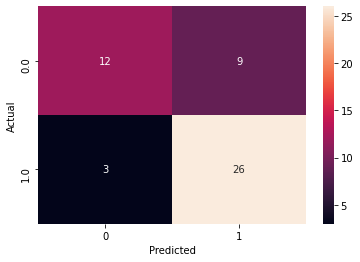

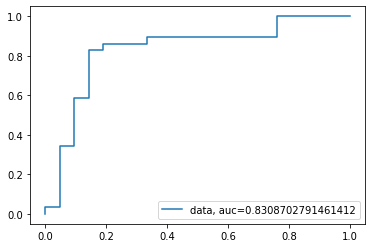



MODE  IMPUTED DATASET using  Lasso
                                    coef  exp_coef
intercept                       0.000000  1.000000
Unnamed: 0                     -0.013153  0.986933
Gender                          0.483334  1.621471
Symptoms                       -0.307471  0.735304
Alcohol                         0.190524  1.209883
Hepatitis B Surface Antigen     0.296888  1.345664
Hepatitis B Core Antibody       0.004375  1.004385
Hepatitis C Virus Antibody     -0.810323  0.444714
Cirrhosis                       0.000000  1.000000
Endemic Countries               0.000000  1.000000
Smoking                         0.000000  1.000000
Diabetes                       -1.269071  0.281093
Obesity                         0.177988  1.194810
Arterial Hypertension           1.603182  4.968816
Chronic Renal Insufficiency     0.000000  1.000000
Nonalcoholic Steatohepatitis    0.000000  1.000000
Esophageal Varices             -0.088025  0.915738
Portal Hypertension             1.166121  3.2

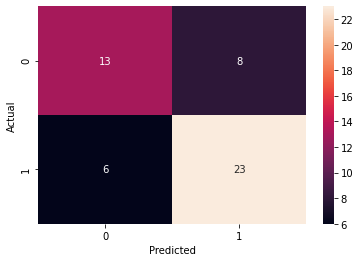

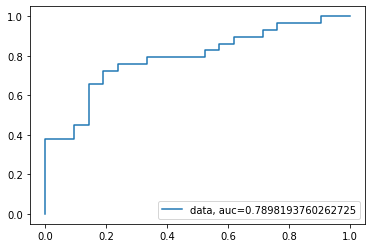



MODE  IMPUTED DATASET using  Ridge
                                    coef  exp_coef
intercept                       0.000000  1.000000
Unnamed: 0                     -0.009842  0.990207
Gender                          0.574084  1.775504
Symptoms                       -0.443683  0.641668
Alcohol                         0.535676  1.708603
Hepatitis B Surface Antigen     0.830322  2.294056
Hepatitis B Core Antibody       0.482230  1.619682
Hepatitis C Virus Antibody     -0.724208  0.484708
Cirrhosis                      -0.094576  0.909758
Endemic Countries               0.151053  1.163058
Smoking                         0.443335  1.557894
Diabetes                       -0.960938  0.382534
Obesity                         0.322454  1.380511
Arterial Hypertension           1.130525  3.097281
Chronic Renal Insufficiency    -0.218801  0.803482
Nonalcoholic Steatohepatitis    0.066471  1.068729
Esophageal Varices             -0.314912  0.729853
Portal Hypertension             0.773673  2.1

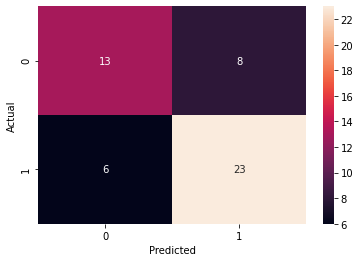

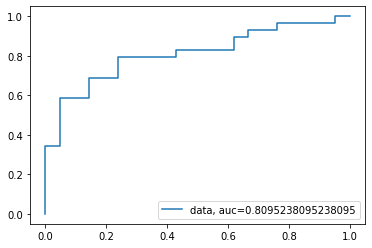



MODE  IMPUTED DATASET using  ElasticNet
                                    coef  exp_coef
intercept                       0.000000  1.000000
Unnamed: 0                     -0.010322  0.989731
Gender                          0.000332  1.000332
Symptoms                       -0.001518  0.998483
Alcohol                         0.000600  1.000601
Hepatitis B Surface Antigen     0.000536  1.000536
Hepatitis B Core Antibody       0.001125  1.001126
Hepatitis C Virus Antibody     -0.001063  0.998938
Cirrhosis                       0.000000  1.000000
Endemic Countries               0.000000  1.000000
Smoking                         0.000585  1.000585
Diabetes                       -0.001146  0.998855
Obesity                         0.000828  1.000828
Arterial Hypertension           0.001579  1.001580
Chronic Renal Insufficiency    -0.000210  0.999790
Nonalcoholic Steatohepatitis    0.000000  1.000000
Esophageal Varices             -0.000433  0.999567
Portal Hypertension             0.000272

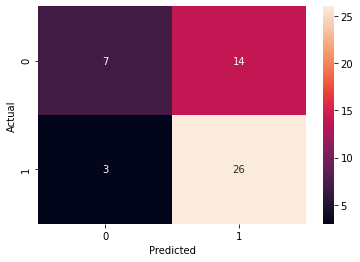

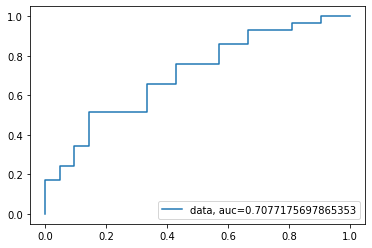



MEDIAN  IMPUTED DATASET using  Lasso
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.736851  2.089346
Symptoms                       -0.430302  0.650313
Alcohol                         0.675787  1.965580
Hepatitis B Surface Antigen     0.321505  1.379202
Hepatitis B Core Antibody       0.170225  1.185571
Hepatitis C Virus Antibody     -0.591688  0.553393
Cirrhosis                       0.000000  1.000000
Endemic Countries               0.000000  1.000000
Smoking                         0.015732  1.015856
Diabetes                       -1.183068  0.306337
Obesity                         0.000000  1.000000
Arterial Hypertension           1.634318  5.125962
Chronic Renal Insufficiency     0.000000  1.000000
Nonalcoholic Steatohepatitis    0.000000  1.000000
Esophageal Varices              0.000000  1.000000
Splenomegaly                    0.000000  1.000000
Portal Vein Thrombosis          0.000000  1

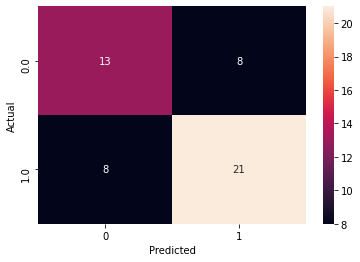

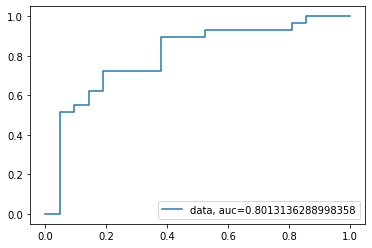



MEDIAN  IMPUTED DATASET using  Ridge
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.670690  1.955586
Symptoms                       -0.514706  0.597676
Alcohol                         0.631448  1.880331
Hepatitis B Surface Antigen     0.797516  2.220020
Hepatitis B Core Antibody       0.496440  1.642862
Hepatitis C Virus Antibody     -0.689374  0.501890
Cirrhosis                      -0.118013  0.888685
Endemic Countries               0.205692  1.228374
Smoking                         0.492751  1.636814
Diabetes                       -0.961697  0.382244
Obesity                         0.261308  1.298628
Arterial Hypertension           1.242655  3.464800
Chronic Renal Insufficiency    -0.190764  0.826328
Nonalcoholic Steatohepatitis    0.054650  1.056171
Esophageal Varices             -0.371480  0.689713
Splenomegaly                    0.085761  1.089546
Portal Vein Thrombosis         -0.232454  0

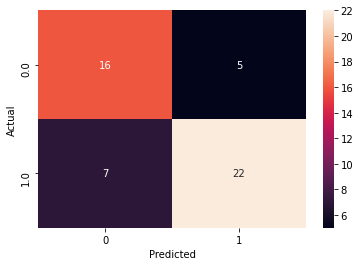

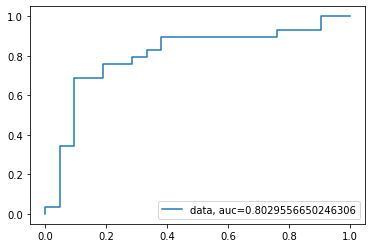



MEDIAN  IMPUTED DATASET using  ElasticNet
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.000473  1.000473
Symptoms                       -0.001934  0.998068
Alcohol                         0.000647  1.000647
Hepatitis B Surface Antigen     0.000715  1.000715
Hepatitis B Core Antibody       0.001021  1.001021
Hepatitis C Virus Antibody     -0.001047  0.998953
Cirrhosis                       0.000000  1.000000
Endemic Countries               0.000131  1.000131
Smoking                         0.000605  1.000605
Diabetes                       -0.000953  0.999047
Obesity                         0.000633  1.000634
Arterial Hypertension           0.001852  1.001853
Chronic Renal Insufficiency    -0.000258  0.999742
Nonalcoholic Steatohepatitis    0.000000  1.000000
Esophageal Varices             -0.000736  0.999264
Splenomegaly                   -0.000342  0.999658
Portal Vein Thrombosis         -0.0008

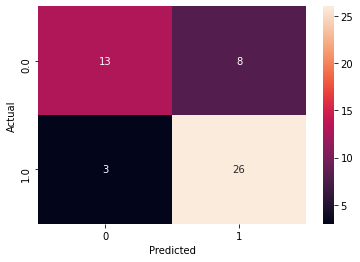

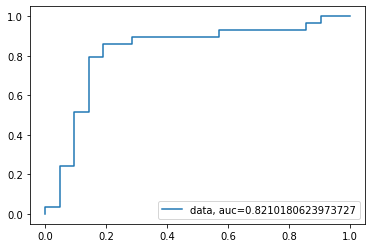



ITERATIVE  IMPUTED DATASET using  Lasso
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.606191  1.833435
Symptoms                       -1.080321  0.339487
Hepatitis B Surface Antigen     0.153007  1.165333
Hepatitis B Core Antibody       0.000000  1.000000
Hepatitis C Virus Antibody     -0.729744  0.482032
Endemic Countries               0.147571  1.159015
Smoking                         0.032925  1.033473
Diabetes                       -1.318874  0.267436
Obesity                         0.118876  1.126230
Arterial Hypertension           1.786231  5.966920
Chronic Renal Insufficiency     0.000000  1.000000
Nonalcoholic Steatohepatitis    0.000000  1.000000
Esophageal Varices              0.000000  1.000000
Splenomegaly                    0.000000  1.000000
Portal Hypertension             0.327041  1.386858
Portal Vein Thrombosis          0.000000  1.000000
Liver Metastasis               -0.248644

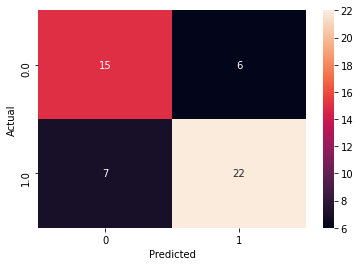

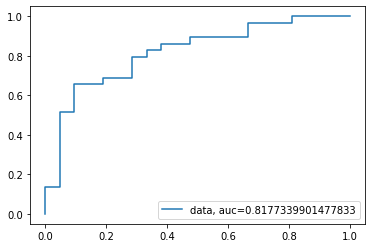



ITERATIVE  IMPUTED DATASET using  Ridge
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.366403  1.442537
Symptoms                       -0.595116  0.551499
Hepatitis B Surface Antigen     0.497537  1.644665
Hepatitis B Core Antibody       0.107478  1.113467
Hepatitis C Virus Antibody     -0.513271  0.598535
Endemic Countries               0.204886  1.227385
Smoking                         0.239212  1.270248
Diabetes                       -0.433298  0.648367
Obesity                         0.207859  1.231040
Arterial Hypertension           0.814411  2.257846
Chronic Renal Insufficiency    -0.065358  0.936732
Nonalcoholic Steatohepatitis    0.027707  1.028094
Esophageal Varices             -0.131331  0.876928
Splenomegaly                   -0.144731  0.865255
Portal Hypertension             0.149765  1.161562
Portal Vein Thrombosis         -0.289786  0.748424
Liver Metastasis               -0.275190

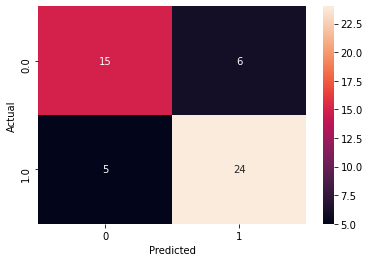

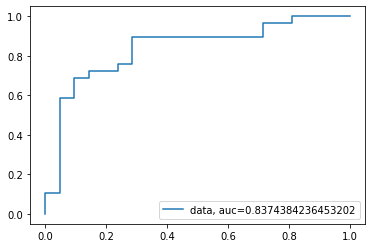



ITERATIVE  IMPUTED DATASET using  ElasticNet
                                    coef  exp_coef
intercept                       0.000000  1.000000
Gender                          0.000402  1.000402
Symptoms                       -0.002613  0.997391
Hepatitis B Surface Antigen     0.000693  1.000693
Hepatitis B Core Antibody       0.000395  1.000395
Hepatitis C Virus Antibody     -0.001267  0.998734
Endemic Countries               0.000283  1.000283
Smoking                         0.000668  1.000668
Diabetes                       -0.000733  0.999267
Obesity                         0.000733  1.000733
Arterial Hypertension           0.002161  1.002163
Chronic Renal Insufficiency    -0.000059  0.999941
Nonalcoholic Steatohepatitis    0.000000  1.000000
Esophageal Varices              0.000000  1.000000
Splenomegaly                   -0.000642  0.999358
Portal Hypertension            -0.000388  0.999612
Portal Vein Thrombosis         -0.000903  0.999097
Liver Metastasis               -0.0

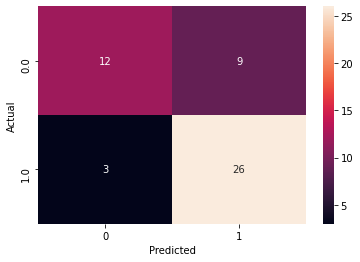

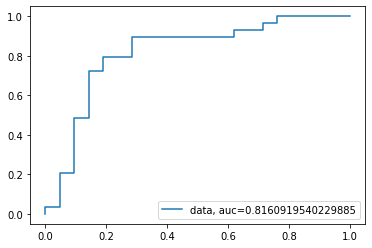

In [9]:
data_list = ['mean', 'mode', 'median', 'iterative']

for data in data_list:
    
    X_train, X_test, y_train, y_test = get_data(data)
    
    X_train, X_test, y_train = feature_selection(X_train, X_test, y_train)
    
    penalties = ['l1', 'l2', 'elasticnet']
    
    for penalty in penalties:
        
        if penalty == 'l1':
            solver = 'liblinear'
            name = 'Lasso'
            l1_ratio = None
            multi_class = 'auto'
        elif penalty == 'l2':
            solver = 'lbfgs'
            name = 'Ridge'
            l1_ratio = None
            multi_class = 'auto'
        elif penalty == 'elasticnet':
            solver='saga'
            name = 'ElasticNet'
            l1_ratio = 0.5
            multi_class = 'ovr'

        print('\n')
        print(data.upper(), ' IMPUTED DATASET using ', name)

        ## run logistic regression using sklearn
        logistic = LogisticRegression(fit_intercept=False, penalty=penalty, solver=solver, multi_class=multi_class, l1_ratio = l1_ratio)
        logistic = logistic.fit(X_train,y_train)
        y_pred = logistic.predict_proba(X_test)[::, 1]
        y_pred = (y_pred >= 0.5).astype(int)

        w = np.array(logistic.coef_).transpose()

        # printing
        values = np.append(logistic.intercept_, logistic.coef_)

        # get the names of the values
        names = np.append('intercept', X_train.columns)
        table_ = pd.DataFrame(values, index = names, columns=['coef'])
        table_['exp_coef'] = np.exp(table_['coef'])
        print(table_)

        print('\n')
        print("Accuracy ({}): {:.2f}".format(data, metrics.accuracy_score(y_test, y_pred)))
        print("Precision ({}): {:.2f}".format(data, metrics.precision_score(y_test, y_pred)))
        print("Recall ({}): {:.2f}".format(data, metrics.recall_score(y_test, y_pred)))

        confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
        sn.heatmap(confusion_matrix, annot=True)
        plt.show()

        y_pred_proba = logistic.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()

        ## save data for comparison
        results = results.append(pd.DataFrame([{"data" : data, 
                        "regularization": name, 
                        "package": "SkLearn", 
                        "accuracy": np.round(metrics.accuracy_score(y_test, y_pred), 2), 
                        "precision": np.round(metrics.precision_score(y_test, y_pred), 2), 
                        "recall": np.round(metrics.recall_score(y_test, y_pred), 2), 
                        "f1": np.round(metrics.f1_score(y_test, y_pred), 2), 
                        "rSquared": np.round(mcfadden_rsquare(w, X_test, y_pred), 2), 
                        "AUC": np.round(metrics.roc_auc_score(y_test, y_pred), 2)}]), ignore_index=True)

In [10]:
results_sklearn = results[results.package == 'SkLearn']
final_sklearn = results_sklearn.pivot(index=['data', 'regularization'], columns="package", values=['accuracy', 'precision', 'recall', 'f1', 'rSquared', 'AUC'])
final_sklearn.columns = final_sklearn.columns.swaplevel(0,1)
final_sklearn

package                   SkLearn                                      
                         accuracy precision recall    f1 rSquared   AUC
data      regularization                                               
iterative ElasticNet         0.76      0.74   0.90  0.81     0.43  0.73
          Lasso              0.74      0.79   0.76  0.77     0.71  0.74
          Ridge              0.78      0.80   0.83  0.81     0.69  0.77
          default            0.78      0.80   0.83  0.81     0.69  0.77
mean      ElasticNet         0.76      0.74   0.90  0.81     0.44  0.73
          Lasso              0.76      0.79   0.79  0.79     0.71  0.75
          Ridge              0.74      0.75   0.83  0.79     0.68  0.72
          default            0.74      0.75   0.83  0.79     0.68  0.72
median    ElasticNet         0.78      0.76   0.90  0.83     0.48  0.76
          Lasso              0.68      0.72   0.72  0.72     0.72  0.67
          Ridge              0.76      0.81   0.76  0.79     0.75  0.76
          default            0.76      0.81   0.76  0.79     0.75  0.76
mode      ElasticNet         0.66      0.65   0.90  0.75     0.64  0.61
          Lasso              0.72      0.74   0.79  0.77     0.81  0.71
          Ridge              0.72      0.74   0.79  0.77     0.79  0.71
          default            0.72      0.74   0.79  0.77     0.79  0.71

In [11]:
results_statsmodels = results[results.package == 'StatsModels']
final_statsmodels = results_statsmodels.pivot(index=['data', 'regularization'], columns="package", values=['accuracy', 'precision', 'recall', 'f1', 'rSquared', 'AUC'])
final_statsmodels.columns = final_statsmodels.columns.swaplevel(0,1)
final_statsmodels

package                  StatsModels                                      
                            accuracy precision recall    f1 rSquared   AUC
data      regularization                                                  
iterative Lasso                 0.70      0.71   0.83  0.76     0.68  0.68
          Ridge                 0.70      0.71   0.83  0.76     0.68  0.68
          default               0.70      0.71   0.83  0.76     0.68  0.68
mean      Lasso                 0.72      0.78   0.72  0.75     0.65  0.72
          Ridge                 0.72      0.78   0.72  0.75     0.65  0.72
          default               0.72      0.78   0.72  0.75     0.65  0.72
median    Lasso                 0.64      0.68   0.72  0.70     0.65  0.62
          Ridge                 0.64      0.68   0.72  0.70     0.65  0.62
          default               0.64      0.68   0.72  0.70     0.65  0.62
mode      Lasso                 0.60      0.64   0.72  0.68     0.74  0.58
          Ridge                 0.60      0.64   0.72  0.68     0.74  0.58
          default               0.60      0.64   0.72  0.68     0.74  0.58